### Lineární regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody SGD.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

In [1]:
import numpy as np
import usu


## Data


In [2]:
npzfile = np.load('data/data_03.npz')
npzfile.files


['x0', 'x1']

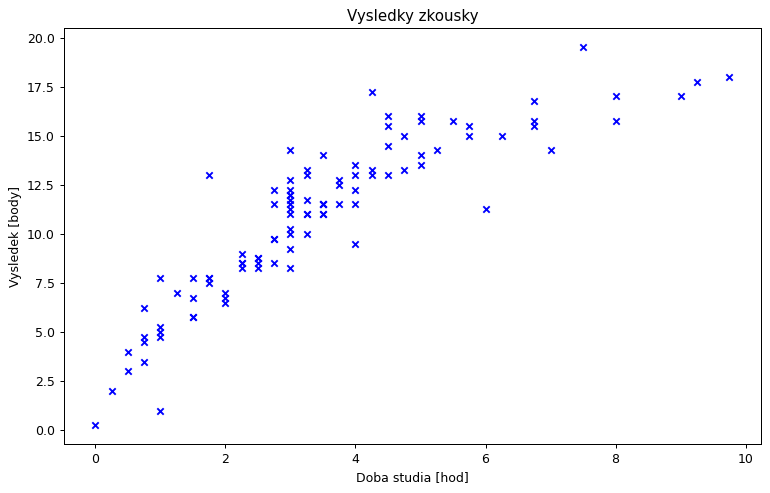

In [3]:
x = npzfile['x0']
y = npzfile['x1']
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


In [4]:
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

## SGD (Steepest gradient descent)

### Výpočet $\theta$:

#### Pomocí sumy:

$$ \theta_{i+1} = \theta_{i} - \alpha \sum_{n=0}^{N} \tilde{X_n} (\theta_i^T \tilde{X_n} - y_n) $$  
kde $\alpha$ je velikost kroku, $n$ odpovídá jednotlivým řádkům vstupních matic.


**Příklad výpočtu první iterace:**

$$ \tilde{X} = \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3 \\
        \end{bmatrix} ,
     y =  \begin{bmatrix}
     15 \\
     20 \\
     30 \\
    \end{bmatrix},
    \theta_0 = \begin{bmatrix}
        0 \\
        0 \\
        \end{bmatrix},
        \alpha = 0.1$$
        
$$ 
\theta_1 = \begin{bmatrix}
        0 \\
        0 \\
        \end{bmatrix} - 0.1 \left[  (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} - 15)\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}) + (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ \end{bmatrix} - 20)\begin{bmatrix} 1 \\ 2 \\ \end{bmatrix}) + (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 3 \\ \end{bmatrix} - 30)\begin{bmatrix} 1 \\ 3 \\ \end{bmatrix}) \right] = \begin{bmatrix} 6.5 \\ 14.5 \\ \end{bmatrix}
$$

 
#### Pomocí  matice:
Maticová implementace je řádově výpočetně efektivnější.

$$ \theta_{i+1} = \theta_{i} - \alpha \tilde{X^T} (\tilde{X} \theta_i - y) $$  


**Poznámka:** Rovnice jsou stejné pro ruzné řády polynomů.


### Výpočet $\theta$ se zahrnutím regularizace:
$$ \theta_{i+1} = \theta_{i}(1-\alpha \lambda) - \alpha \tilde{X^T} (\tilde{X} \theta_i - y) $$ 


In [48]:
def computeThetaSGD(x, y, alpha=0.1, nIter=100, order=1, lmbd=0):
    """
    x - vektor vstupnich hodnot, doba studia
    y - vektor vystupnich  hodnot, zisk bodu
    alpha - krok
    nIter - pocet iteraci
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    """

    #################################################################
    # ZDE DOPLNIT

    x = np.ravel(x)
    X = np.vander(x, order+1, increasing=True)

    theta = np.random.rand(order+1, 1)
    for _ in range(nIter):
        grad = -alpha * X.T @ (X @ theta - y)
        theta = theta * (1 - alpha * lmbd) + grad
    
    #################################################################
    return theta


Kontrola výpočtu na malém množství dat:

In [61]:
a = np.array([1, 2, 3], ndmin=2).T
b = np.array([15, 20, 30], ndmin=2).T
theta = computeThetaSGD(a, b, nIter=1)
print(theta)
#usu.draw(a, b, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta)


[[ 6.43396596]
 [13.6911675 ]]


Určete zisk bodů v případě přípravy v délce 6 hodin. Všimněte si, jak silně $\alpha$ ovlivňuje výsledky:

x : 6.000, y : 15.344


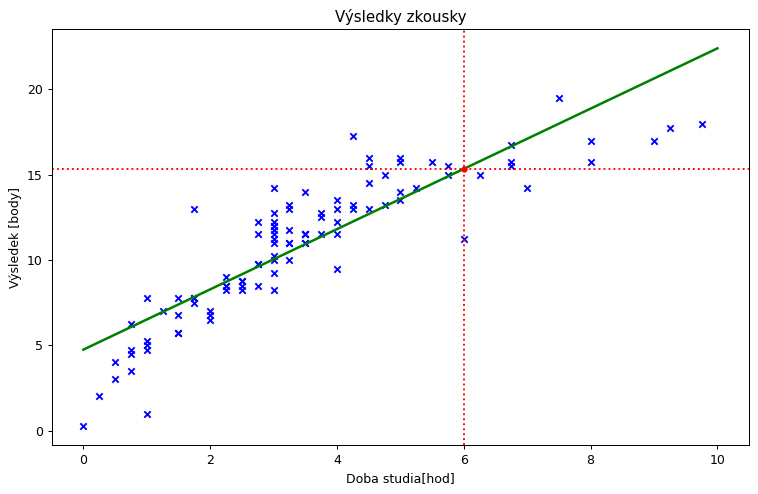

In [63]:
alpha = 0.00001
iterations = 15000
theta = computeThetaSGD(x, y, alpha, iterations)

#################################################################
# ZDE DOPLNIT

valueX = 6
valueY = theta[0] + theta[1] * valueX

# Nejvhodnejsi rad polynomu a proc: ...

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


Určete dobu studia v případě zisku 10 bodů:


x : 3.026, y : 10.000


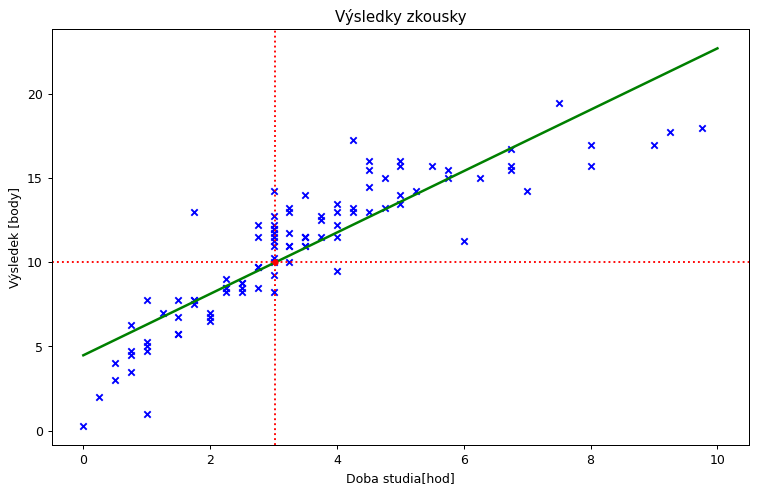

In [64]:
alpha = 0.001
iterations = 100

theta = computeThetaSGD(x, y, alpha, iterations)
#print(theta)

#################################################################
# ZDE DOPLNIT

valueY = 10
valueX = (valueY - theta[0]) / theta[1]

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


Určete zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2, $\lambda$ = 1, $\alpha$ = 
0.00001 a počtu iterací 15000:

x : 4.000, y : 12.845


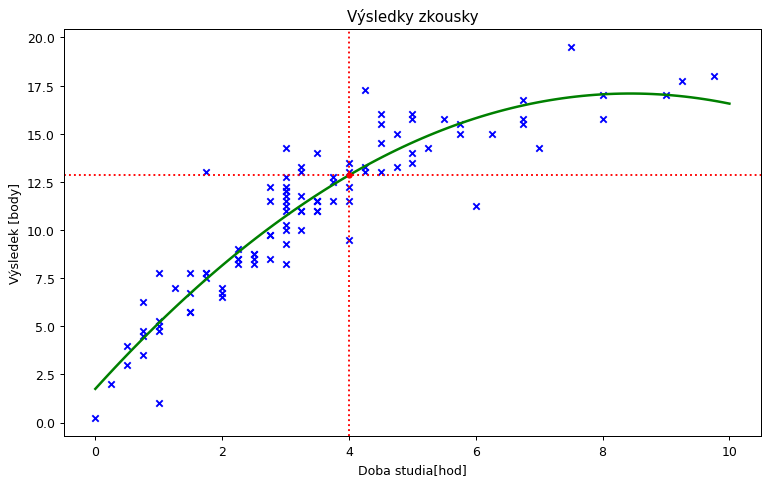

In [10]:
order = 2
lmbd = 1
alpha = 0.00001
iterations = 15000

theta = computeThetaSGD(x, y, alpha, iterations, order, lmbd)
#print(theta)

#################################################################
# ZDE DOPLNIT

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


### Závěr:
rozhodněte, kdy je vhodnější použít pro nalezení parametrů $\theta$ metodu LSE a kdy SGD:
